
### Rainfall prediction in Maharashtra using Time Series Analysis

# Literature References:
Talhar, J. A., Ramgirkar, A. G., & Jena, P. K. (2022). Time Series Analysis and Forecasting of Precipitation (Rainfall) Data. ECS Transactions, 107(1), 1271.

Mithiya, D., Mandal, K., & Bandyopadhyay, S. (2020). Time series analysis and forecasting of rainfall for agricultural crops in India: An application of artificial neural network. Research in Applied Economics, 12(4), 1-21.


In [1]:


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 12,5
import warnings
warnings.filterwarnings(action = 'ignore')

## Loading data

In [3]:
df = pd.read_csv("Rainfall_data.csv")

In [4]:
df.head()

,Year,Month,Day,Specific Humidity,Relative Humidity,Temperature,Precipitation
0,2000,1,1,8.06,48.25,23.93,0.00
1,2000,2,1,8.73,50.81,25.83,0.11
2,2000,3,1,8.48,42.88,26.68,0.01
3,2000,4,1,13.79,55.69,22.49,0.02
4,2000,5,1,17.40,70.88,19.07,271.14


In [5]:
df.describe()

,Year,Month,Day,Specific Humidity,Relative Humidity,Temperature,Precipitation
count,252.000000,252.000000,252.0,252.000000,252.000000,252.000000,252.000000
mean,2010.000000,6.500000,1.0,14.416746,67.259524,16.317262,206.798929
std,6.067351,3.458922,0.0,4.382599,17.307101,6.584842,318.093091
min,2000.000000,1.000000,1.0,5.740000,34.690000,4.730000,0.000000
25%,2005.000000,3.750000,1.0,10.010000,51.845000,10.865000,0.402500
50%,2010.000000,6.500000,1.0,15.200000,66.655000,16.915000,11.495000
75%,2015.000000,9.250000,1.0,18.875000,84.610000,22.115000,353.200000
max,2020.000000,12.000000,1.0,20.570000,92.310000,29.340000,1307.430000


In [6]:
df.shape

(252, 7)

#### setting date as index


In [7]:
df['DATE'] = pd.to_datetime(df[['Year', 'Month','Day']])
df = df.drop(columns=['Year', 'Month','Day'])
df.index = df["DATE"]
df.drop(columns=["DATE"],inplace = True)
df

,Specific Humidity,Relative Humidity,Temperature,Precipitation
DATE,,,,
2000-01-01,8.06,48.25,23.93,0.00
2000-02-01,8.73,50.81,25.83,0.11
2000-03-01,8.48,42.88,26.68,0.01
2000-04-01,13.79,55.69,22.49,0.02
2000-05-01,17.40,70.88,19.07,271.14
...,...,...,...,...
2020-08-01,20.08,92.31,5.34,1203.09
2020-09-01,19.71,90.12,9.22,361.30
2020-10-01,18.43,82.69,12.62,180.18


<Axes: xlabel='DATE'>

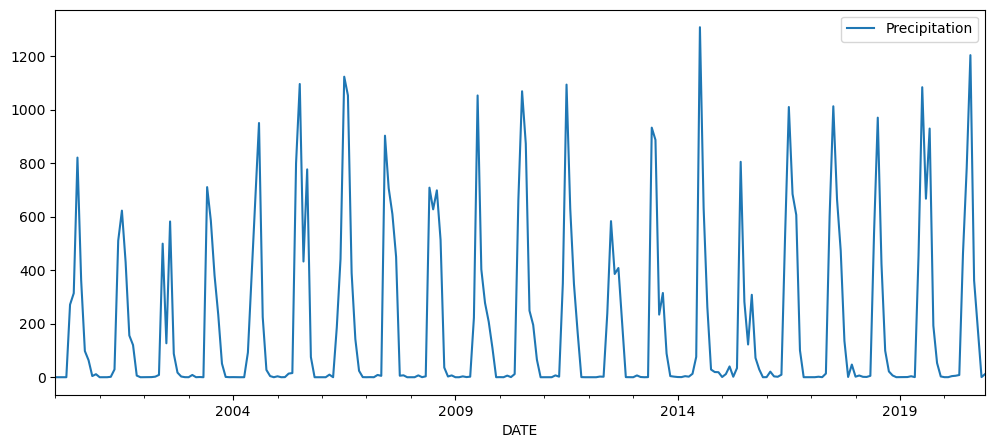

In [8]:
rain = pd.DataFrame(df["Precipitation"])
rain.index.freq = 'MS'
rain.plot()

## Seasonal Decomposition

* A time series data is composed of
    * Trend: Trend is the overall direction of the data.
    * Seasonlity: Seasonality is a periodic component which repeats itself within a particulat time period.
    * Residuals: the residual is what’s left over when the trend and seasonality have been removed. Residuals are random fluctuations.


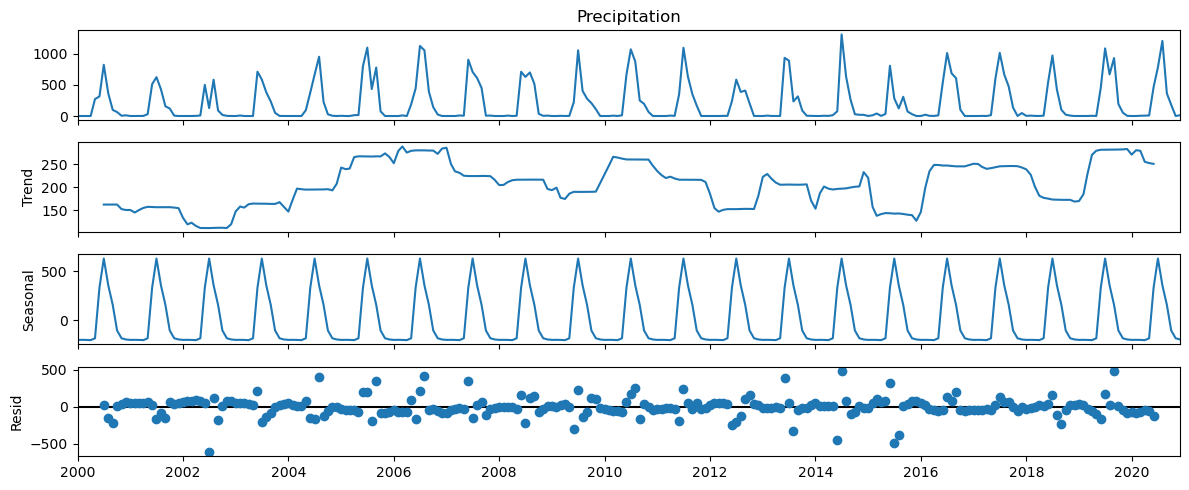

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
add = seasonal_decompose(rain["Precipitation"],model='add',period = 12)
add.plot();

## Train and Test Split

* Using 20 years data for training (2000-01-01 to 2019-12-01)
* Using 1 year data for Testing (2020-01-01 to 2020-12-01)

In [10]:
df.shape

(252, 4)

In [11]:
test_period = 12
len(df)-12 ## 12 is our testing period

240

In [12]:
# training
train_data = df.iloc[:len(df)-test_period,:]
# testing
test_data = df.iloc[len(df)-test_period:,:]

In [13]:
test_data.shape

(12, 4)

In [14]:
def plotting(test_predictions):
    train_data['Precipitation'].plot(legend=True,label='TRAIN')
    test_data['Precipitation'].plot(legend=True,label='TEST',figsize=(13,7));
    test_predictions.plot(legend=True,label='PREDICTION');

In [15]:
def zoom_plotting(test_predictions):
    train_data['Precipitation'].plot(legend=True,label='TRAIN')
    test_data['Precipitation'].plot(legend=True,label='TEST',figsize=(13,7))
    test_predictions.plot(legend=True,label='PREDICTION',xlim=['2020-01-01','2020-12-01']);


In [16]:
def metrics(test_data,test_predictions):
    print("MAE: ",mean_absolute_error(test_data,test_predictions))
    print("MSE: ",mean_squared_error(test_data,test_predictions))
    print("RMSE: ",np.sqrt(mean_squared_error(test_data,test_predictions)))

# 1. Simple Seasonal Exponential Smoothing

In [17]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# For single exponential smoothing, no need to specify trend or seasonality
single_fitted_model = ExponentialSmoothing(train_data['Precipitation']).fit()


#### Making predictions


In [18]:
test_predictions = single_fitted_model.forecast(test_period).rename('HW Forecast')
test_predictions

2020-01-01    4.388405
2020-02-01    4.388405
2020-03-01    4.388405
2020-04-01    4.388405
2020-05-01    4.388405
2020-06-01    4.388405
2020-07-01    4.388405
2020-08-01    4.388405
2020-09-01    4.388405
2020-10-01    4.388405
2020-11-01    4.388405
2020-12-01    4.388405
Freq: MS, Name: HW Forecast, dtype: float64

#### plotting


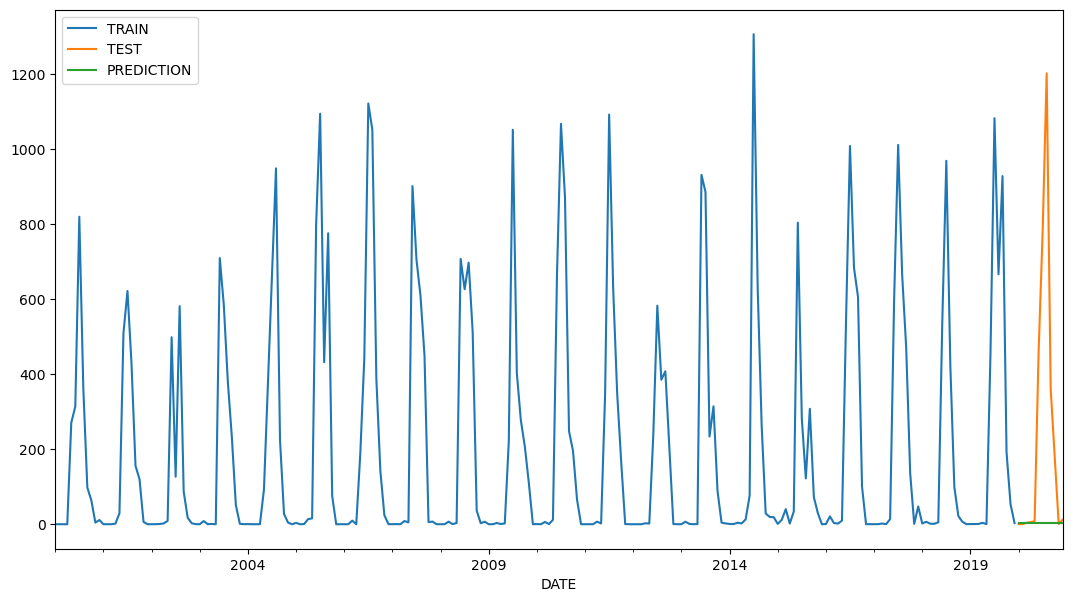

In [19]:
plotting(test_predictions)

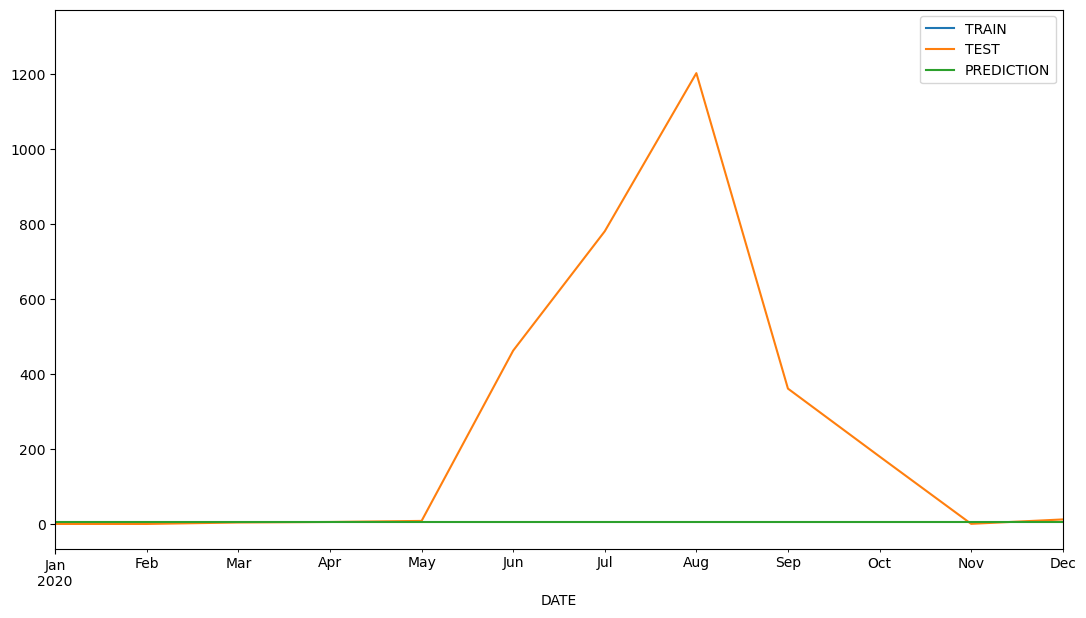

In [20]:
zoom_plotting(test_predictions)

In [21]:
print("Simple Seasonal Exponential Smoothing model: ")
metrics(test_data["Precipitation"],test_predictions)

Simple Seasonal Exponential Smoothing model: 
MAE:  249.32469829189904
MSE:  200724.07033387478
RMSE:  448.02239936623124


# 1'. Triple Seasonal Exponential Smoothing

In [22]:
## For triple exponential smoothing we pass the trend,seasonality and seasonal period parameter
triple_fitted_model = ExponentialSmoothing(train_data['Precipitation'],trend='add',seasonal = "add",seasonal_periods=test_period).fit()

#### Making predictions


In [23]:
test_predictions = triple_fitted_model.forecast(test_period).rename('HW Forecast')
test_predictions

2020-01-01     37.925204
2020-02-01     42.321686
2020-03-01     43.466087
2020-04-01     41.532842
2020-05-01     57.432405
2020-06-01    571.590375
2020-07-01    937.992820
2020-08-01    580.738942
2020-09-01    454.676185
2020-10-01    142.726412
2020-11-01     55.958023
2020-12-01     50.948639
Freq: MS, Name: HW Forecast, dtype: float64

#### plotting

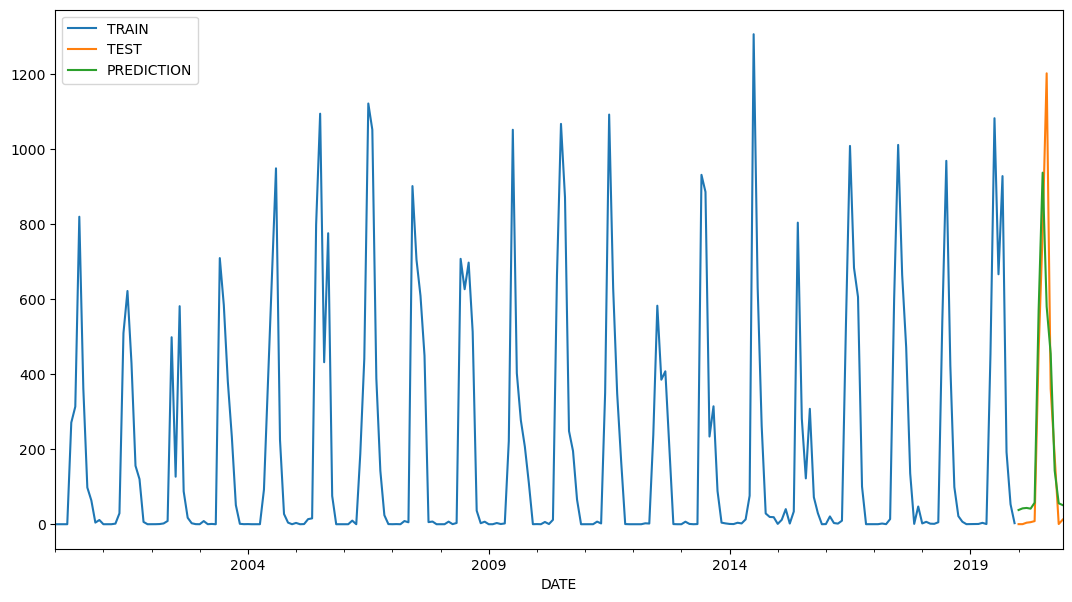

In [24]:
plotting(test_predictions)

In [25]:
print("Triple Seasonal Exponential Smoothing model: ")
metrics(test_data["Precipitation"],test_predictions)

Triple Seasonal Exponential Smoothing model: 
MAE:  109.79907604117045
MSE:  37245.556167809365
RMSE:  192.99107794872117


## Checking for stationarity in data

### Augemented Dickey Fullers test
Stationarity testing hypothesis:
* Null Hypothesis: Data has unit roots which means data is **non stationary**
* Alternate hypothesis: Data does not has unit roots means data is **stationary**


In [26]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data

    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val

    print(out.to_string())          # .to_string() removes the line "dtype: float64"

    if result[1] <= 0.05:           # using p-value
        print("-> Strong evidence against the null hypothesis")
        print("-> Reject the null hypothesis")
        print("-> Data has no unit root and is stationary")
    else:
        print("-> Weak evidence against the null hypothesis")
        print("-> Fail to reject the null hypothesis")
        print("-> Data has a unit root and is non-stationary")

In [27]:
adf_test(rain,title='rainfall')

Augmented Dickey-Fuller Test: rainfall
ADF test statistic       -2.466325
p-value                   0.123884
# lags used              12.000000
# observations          239.000000
critical value (1%)      -3.458011
critical value (5%)      -2.873710
critical value (10%)     -2.573256
-> Weak evidence against the null hypothesis
-> Fail to reject the null hypothesis
-> Data has a unit root and is non-stationary


### ACF(Auto correlation Function) and PACF(Partial auto correlation Function) plot



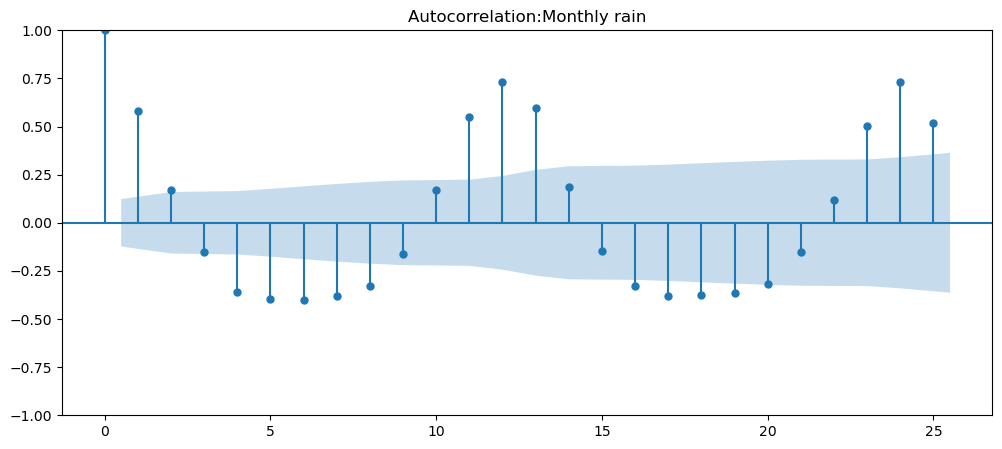

In [28]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# Now let's plot the autocorrelation at different lags
title = 'Autocorrelation:Monthly rain'
plot_acf(rain,title=title);

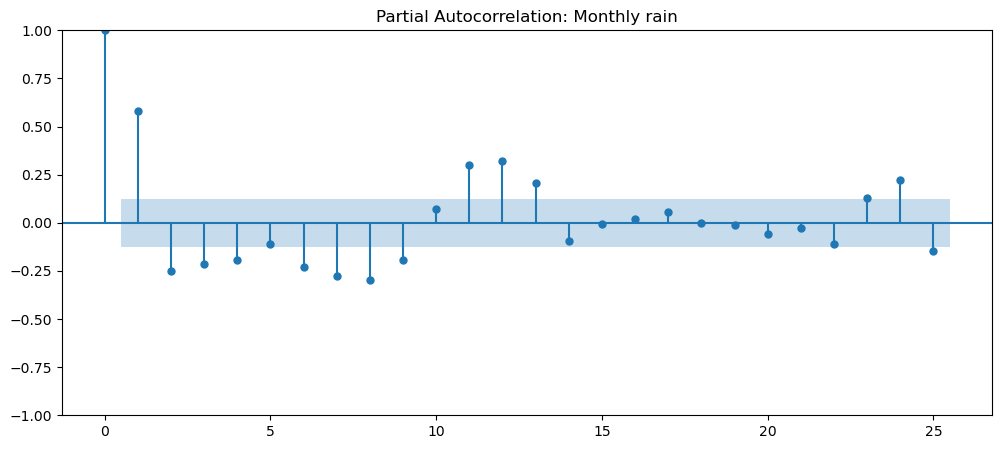

In [29]:
title='Partial Autocorrelation: Monthly rain'
plot_pacf(rain,title=title);

In [30]:
rain_diff = rain.diff().dropna()
adf_test(rain_diff, title='Differenced Rainfall')

Augmented Dickey-Fuller Test: Differenced Rainfall
ADF test statistic     -1.624695e+01
p-value                 3.678602e-29
# lags used             1.100000e+01
# observations          2.390000e+02
critical value (1%)    -3.458011e+00
critical value (5%)    -2.873710e+00
critical value (10%)   -2.573256e+00
-> Strong evidence against the null hypothesis
-> Reject the null hypothesis
-> Data has no unit root and is stationary


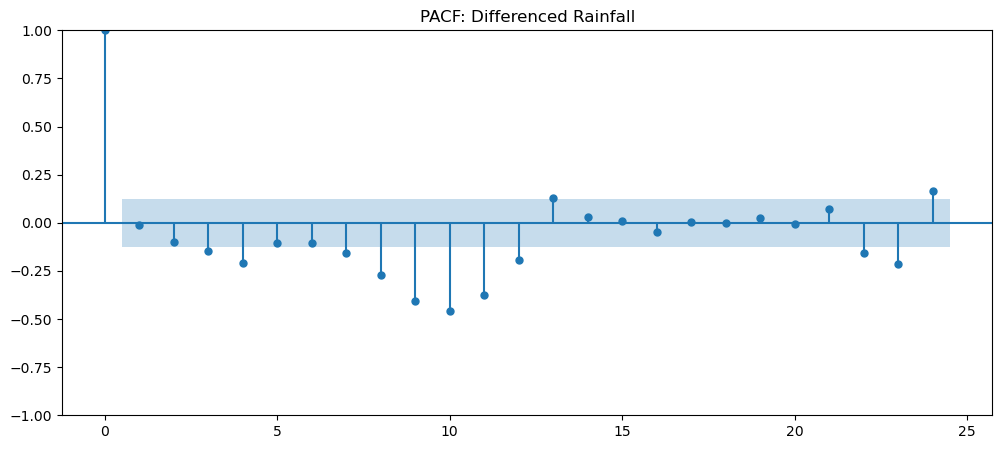

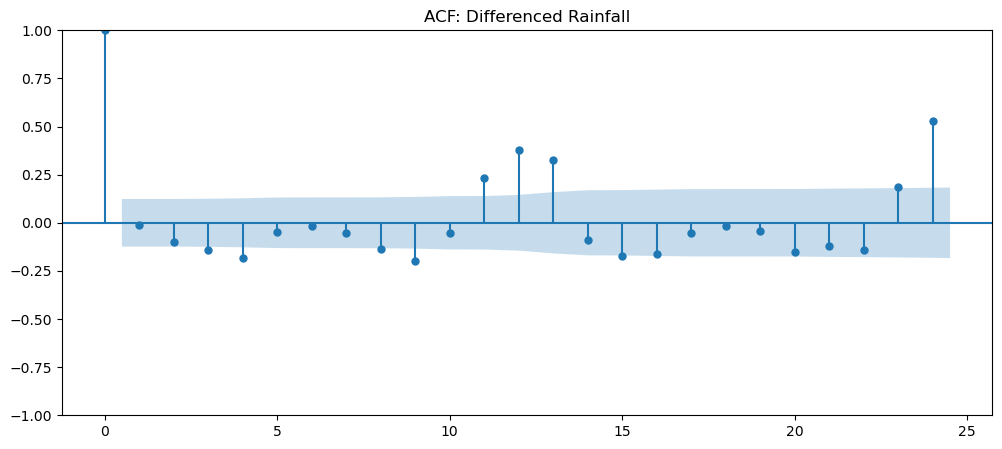

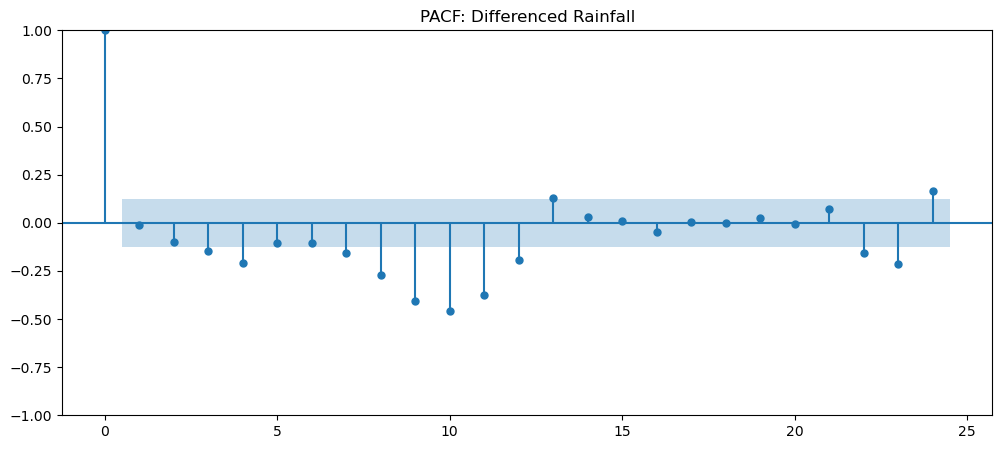

In [31]:
plot_acf(rain_diff, title='ACF: Differenced Rainfall')
plot_pacf(rain_diff, title='PACF: Differenced Rainfall')

Both the ACF and PACF did not drop quickly, indicating that the data is not stationary.

# 2. Seasonal Autoregressive Integrated Moving Average (SARIMA)

Using seasonal ARIMA as we know data has seasonality and trend and data is non stationary

* Train and Test Split

In [32]:
#### training
train_data = df.iloc[:len(df)-12,:]
#### testing
test_data = df.iloc[len(df)-12:,:]

In [33]:
!pip install statsmodels

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

paper_model = SARIMAX(train_data['Precipitation'],order=(0,0,0),seasonal_order=(5,1,[0],12))
paper_results = paper_model.fit()

In [35]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
paper_predictions = paper_results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(0,0,0)(0,1,[0],12) Predictions')

Compare predictions to expected values


In [36]:
for i in range(len(paper_predictions)):
    print(f"predicted={paper_predictions[i]:<11.10}, expected={test_data['Precipitation'][i]}")

predicted=0.9402066415, expected=0.17
predicted=6.212609531, expected=0.19
predicted=9.127874018, expected=4.09
predicted=1.288857632, expected=5.46
predicted=13.56646492, expected=8.29
predicted=548.8559096, expected=462.71
predicted=899.1010081, expected=781.13
predicted=486.8353834, expected=1203.09
predicted=339.0648231, expected=361.3
predicted=76.26877537, expected=180.18
predicted=12.78226166, expected=0.49
predicted=13.83057684, expected=12.23


Plot predictions against known values


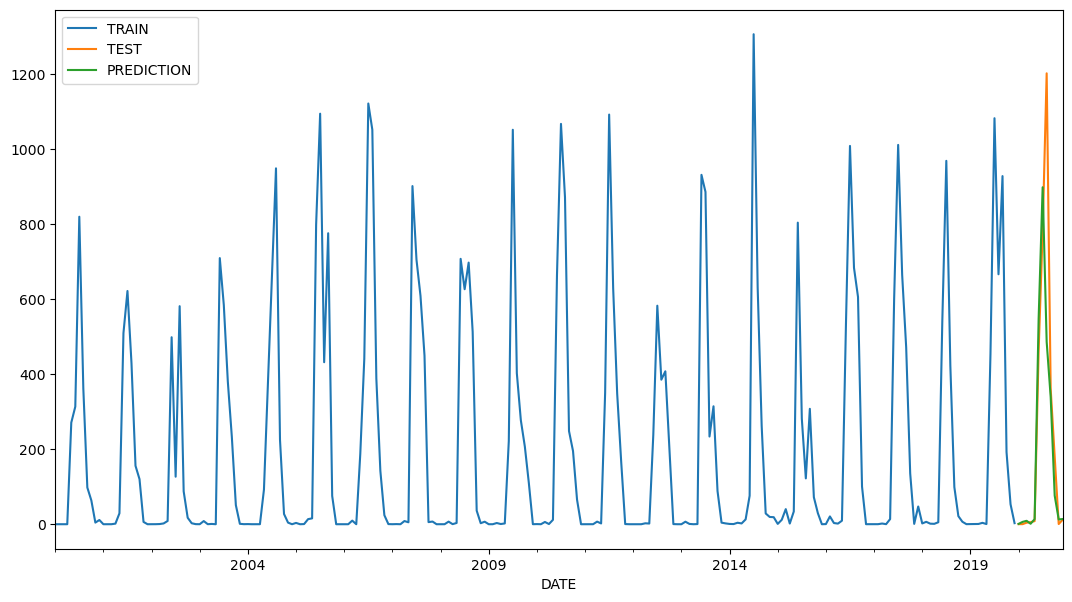

In [37]:
plotting(paper_predictions)

Plot predictions against known values


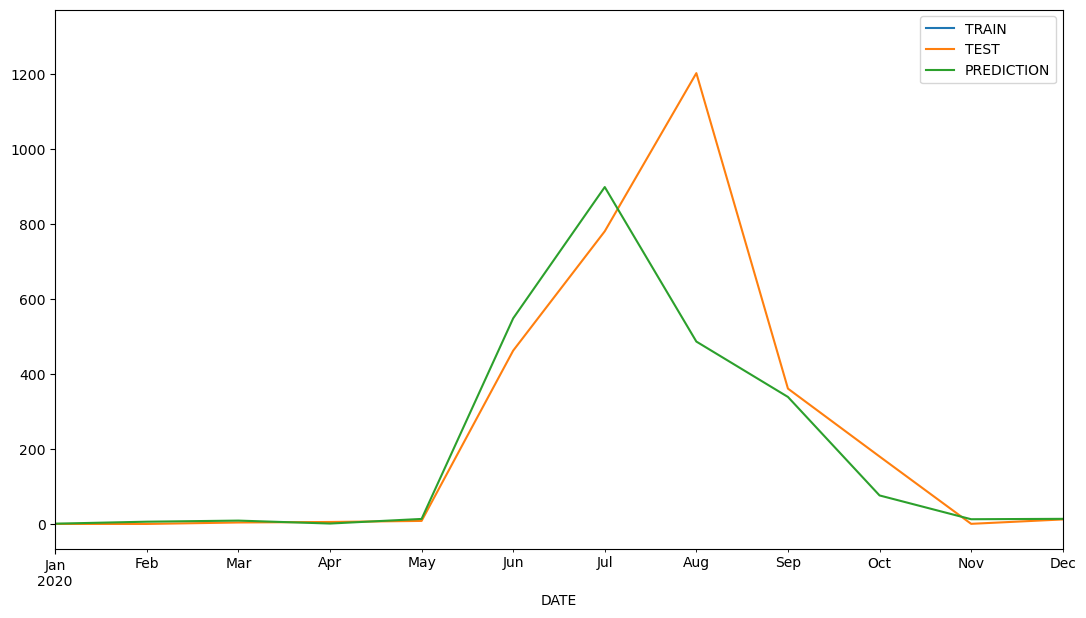

In [38]:
zoom_plotting(paper_predictions)

evaluation


In [39]:
print("Simple Seasonal Exponential Smoothing model: ")
metrics(test_data["Precipitation"],test_predictions)
print('\n')
print("Triple Seasonal Exponential Smoothing model: ")
metrics(test_data["Precipitation"],test_predictions)
print('\n')
print("Sarima paper model: ")
metrics(test_data["Precipitation"],paper_predictions)

Simple Seasonal Exponential Smoothing model: 
MAE:  109.79907604117045
MSE:  37245.556167809365
RMSE:  192.99107794872117


Triple Seasonal Exponential Smoothing model: 
MAE:  109.79907604117045
MSE:  37245.556167809365
RMSE:  192.99107794872117


Sarima paper model: 
MAE:  90.1407559866001
MSE:  45492.67035436078
RMSE:  213.2901084306555


# Autoarima


In [40]:
!pip install pmdarima

In [41]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

auto_arima(rain['Precipitation'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  252
Model:             SARIMAX(1, 0, 0)x(2, 0, [1], 12)   Log Likelihood               -1642.260
Date:                              Sun, 06 Apr 2025   AIC                           3296.520
Time:                                      14:31:53   BIC                           3317.696
Sample:                                  01-01-2000   HQIC                          3305.041
                                       - 12-01-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9339      2.807      0.689      0.491      -3.568       7.436
ar.L1          0.1216      0.045      2.684      0.007       0.033       0.210
ar.S.L12       0.7409      0.052     14.252      0.000       0.639       0.843
ar.S.L24       0.2474      0.050      4.978      0.000       0.150       0.345
ma.S.L12      -0.7333      0.054    -13.491      0.000      -0.840      -0.627
sigma2      2.358e+04   1112.574     21.196      0.000    2.14e+04    2.58e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               347.43
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                             1.07
Prob(H) (two-sided):                  0.67   Kurtosis:                         8.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The predicted values are SARIMAX(1, 0, 0)x(2, 0, [1], 12)

In [42]:
model = SARIMAX(train_data['Precipitation'],order=(1,0,0),seasonal_order=(2,0,[1],12))
results = model.fit()

In [43]:
# Obtain predicted values
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(1,0,0)(2,0,[1],12) Predictions')

In [44]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test_data['Precipitation'][i]}")

predicted=0.111708869, expected=0.17
predicted=3.381151347, expected=0.19
predicted=4.645489035, expected=4.09
predicted=2.129888656, expected=5.46
predicted=35.15067729, expected=8.29
predicted=541.0012398, expected=462.71
predicted=805.7227679, expected=781.13
predicted=537.9486803, expected=1203.09
predicted=286.6159058, expected=361.3
predicted=85.04817628, expected=180.18
predicted=12.19879354, expected=0.49
predicted=5.157684963, expected=12.23


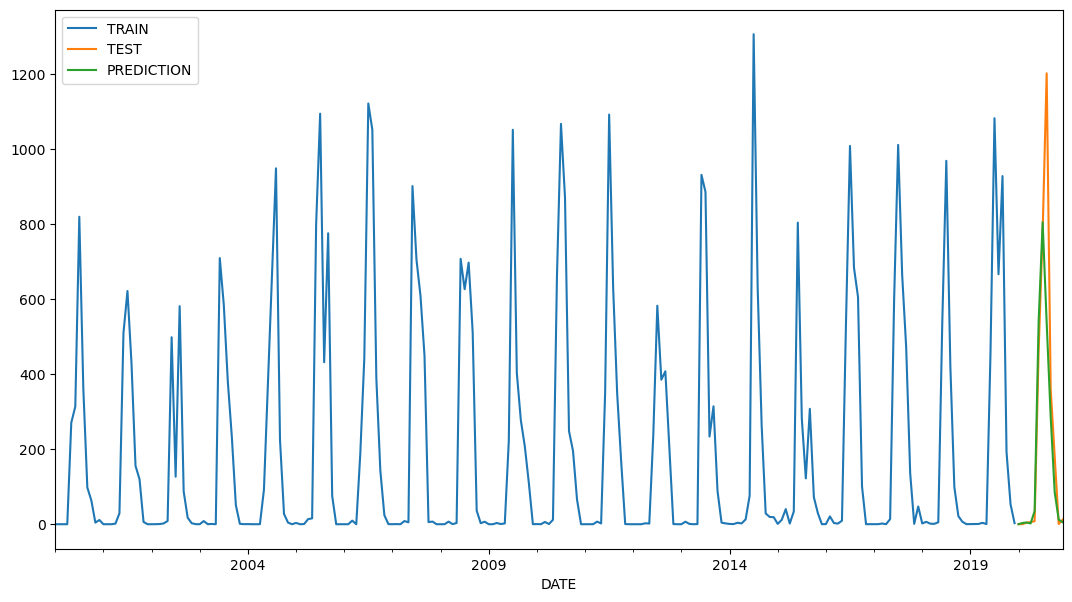

In [45]:
plotting(predictions)

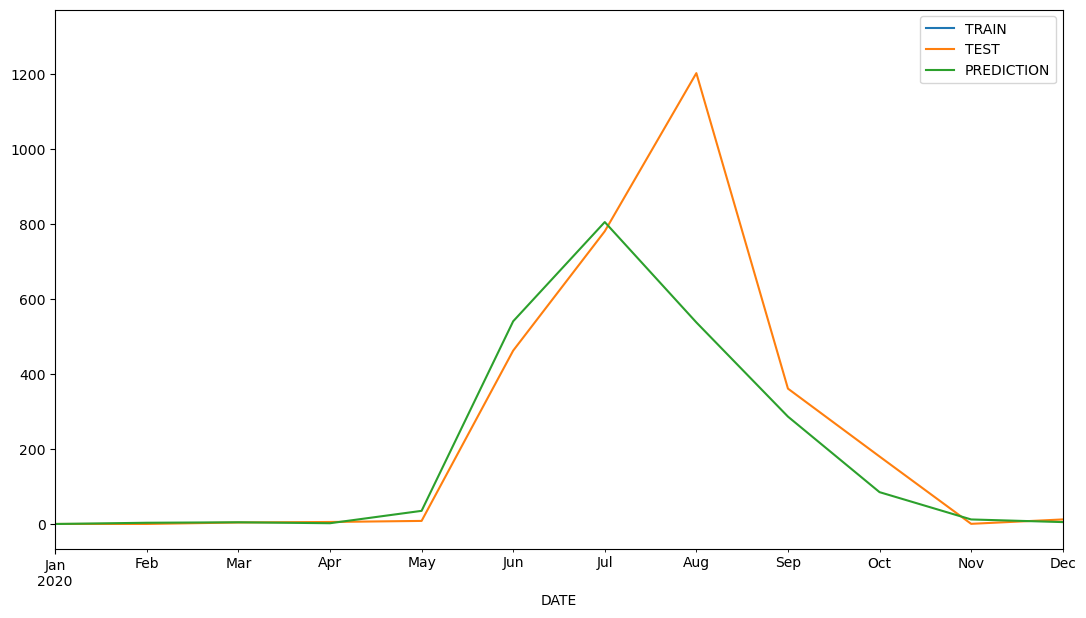

In [46]:
zoom_plotting(predictions)

In [47]:
print("Triple Seasonal Exponential Smoothing model: ")
metrics(test_data["Precipitation"],test_predictions)
print('\n')
print("Sarima paper model: ")
metrics(test_data["Precipitation"],paper_predictions)
print('\n')
print("SARIMA autoarima Smoothing model: ")
metrics(test_data["Precipitation"],predictions)

Triple Seasonal Exponential Smoothing model: 
MAE:  109.79907604117045
MSE:  37245.556167809365
RMSE:  192.99107794872117


Sarima paper model: 
MAE:  90.1407559866001
MSE:  45492.67035436078
RMSE:  213.2901084306555


SARIMA autoarima Smoothing model: 
MAE:  82.55150616155848
MSE:  38725.43916106562
RMSE:  196.7878023686062


# 3. Non Linear Model: Artificial Neural Network

In [48]:
df.head()

,Specific Humidity,Relative Humidity,Temperature,Precipitation
DATE,,,,
2000-01-01,8.06,48.25,23.93,0.00
2000-02-01,8.73,50.81,25.83,0.11
2000-03-01,8.48,42.88,26.68,0.01
2000-04-01,13.79,55.69,22.49,0.02
2000-05-01,17.40,70.88,19.07,271.14


In [49]:
df.shape

(252, 4)

## Prepare the input (X) and output (y) datasets


In [50]:
def create_dataset(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)


Using the pacf plot to determine the best numbre of lags to include

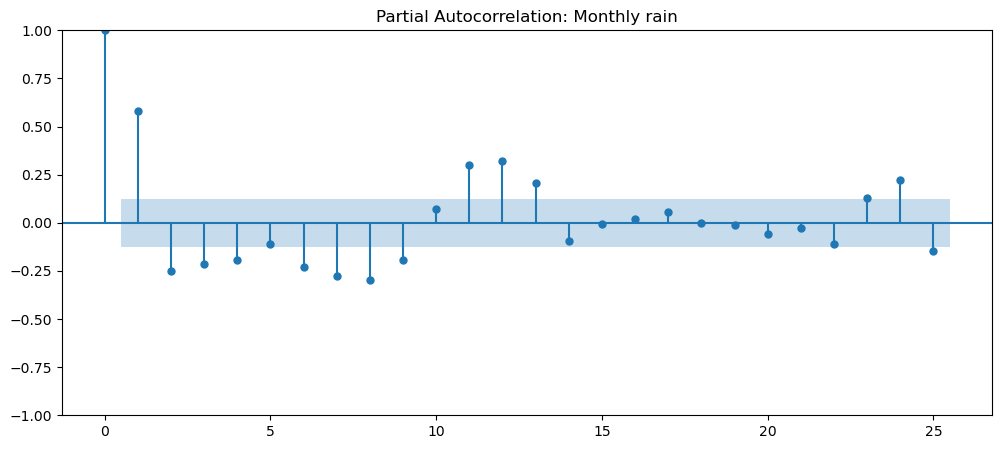

In [51]:
title='Partial Autocorrelation: Monthly rain'
plot_pacf(rain,title=title);

* The point where the values drop off significantly can be a good indication of how many lags to include.

In [52]:
p = 13             # Using  lagged observations
X, y = create_dataset(df.values, p)

In [53]:
print(X.shape)    #2D array
print(y.shape)

(239, 13)
(239,)


## Train and Test Split

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape

(191, 13)

## Normalize the data


In [55]:
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the training data
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

In [56]:
# Reshape y to fit into the scaler
y_train = y_train.reshape(-1, 1)  # Reshape to 2D for scaling
y_test = y_test.reshape(-1, 1)

# Fit and transform the target variable
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

## the ANN Model

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization


model = Sequential()
model.add(Dense(64, input_dim=13, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))  # Dropout layer with 50% drop rate
model.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons
model.add(Dense(1))  # Output layer for regression


In [58]:
model.compile(optimizer='adam', loss='mean_squared_error')
model

<Sequential name=sequential, built=True>

In [59]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
import datetime

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=10,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping, reduce_lr],
                    verbose=1)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 1.0062 - val_loss: 0.0815 - learning_rate: 0.0010
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5437 - val_loss: 0.0770 - learning_rate: 0.0010
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6133 - val_loss: 0.1077 - learning_rate: 0.0010
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4655 - val_loss: 0.1155 - learning_rate: 0.0010
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3110 - val_loss: 0.1251 - learning_rate: 0.0010
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2671 - val_loss: 0.1578 - learning_rate: 0.0010
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2280 - val_loss: 0.1602 - learning_rate: 0.0010
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2349 - val_loss: 0.1729 - learning_rate: 0.0010
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1720 - val_loss: 0.1599 - learning_rate: 0.0010
Epoch 10/100
20/

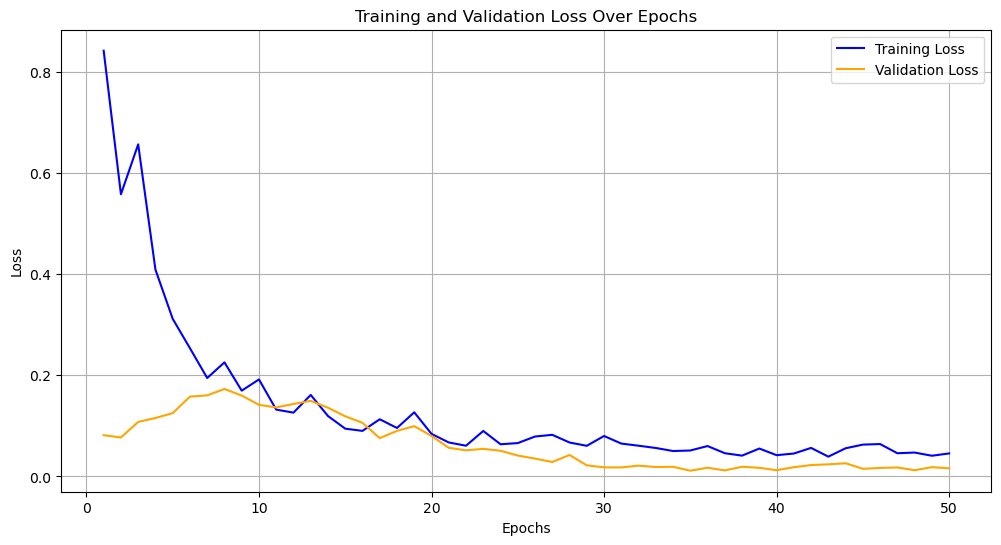

In [60]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a range for the number of epochs
epochs = range(1, len(loss) + 1)

# Plotting the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(epochs, loss, label='Training Loss', color='blue')
plt.plot(epochs, val_loss, label='Validation Loss', color='orange')

# Adding titles and labels
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Show the plot
plt.show()

### Predict

In [61]:
pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


#### Inverse the normalization for predictions and true values


In [62]:
y_test_inv = scaler_y.inverse_transform(y_test)
predictions_inv = scaler_y.inverse_transform(pred)

#### Plot the results


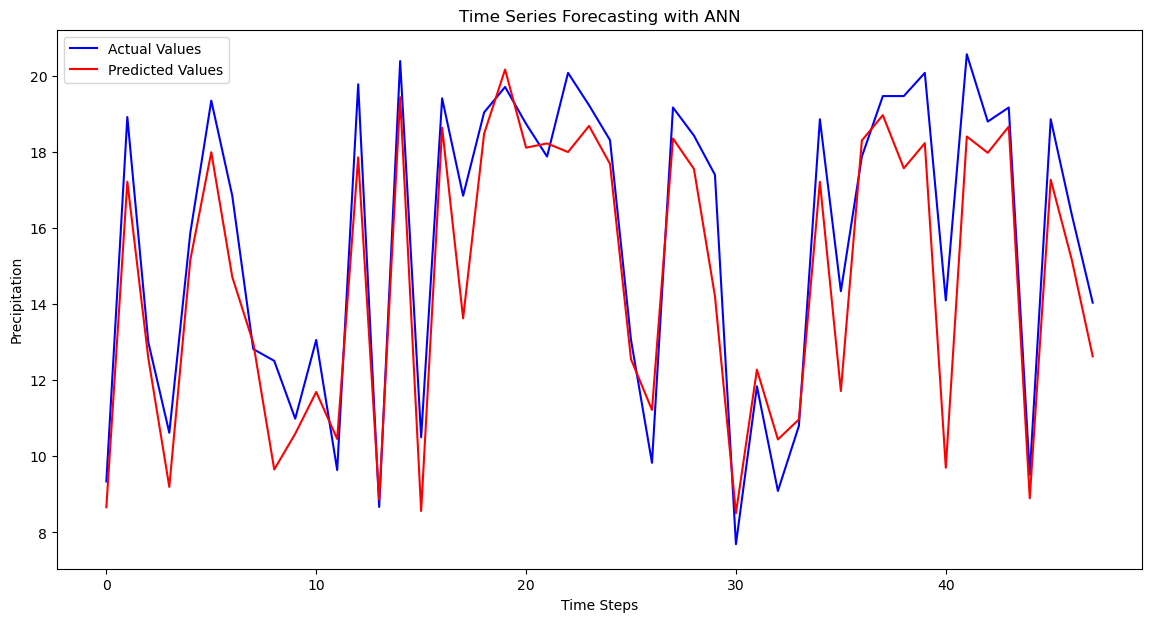

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Actual Values', color='blue')
plt.plot(predictions_inv, label='Predicted Values', color='red')
plt.title('Time Series Forecasting with ANN')
plt.xlabel('Time Steps')
plt.ylabel('Precipitation')
plt.legend()
plt.show()

### Evaluate

In [64]:
print("Triple Seasonal Exponential Smoothing model: ")
metrics(test_data["Precipitation"],test_predictions)
print('\n')
print("Sarima paper model: ")
metrics(test_data["Precipitation"],paper_predictions)
print('\n')
print("SARIMA autoarima Smoothing model: ")
metrics(test_data["Precipitation"],predictions)
print('\n')
print("ANN model: ")
metrics(y_test_inv,predictions_inv)

Triple Seasonal Exponential Smoothing model: 
MAE:  109.79907604117045
MSE:  37245.556167809365
RMSE:  192.99107794872117


Sarima paper model: 
MAE:  90.1407559866001
MSE:  45492.67035436078
RMSE:  213.2901084306555


SARIMA autoarima Smoothing model: 
MAE:  82.55150616155848
MSE:  38725.43916106562
RMSE:  196.7878023686062


ANN model: 
MAE:  1.2383744009335835
MSE:  2.365568251818361
RMSE:  1.5380403934287166
